,Total P&L,Max Drawdown,Total Trades,Percent Profitable,Profit Factor,Expectancy
Overview performance,3.48%,0.00%,17,100.00%,1797693134862315708145274237317043567980705675...,0.0020


,Total Trades,Number of Winning Trades,Number of Losing Trades,Average Trade (%),Average Win (%),Average Loss (%),Largest Win (%),Largest Loss (%)
Trades analysis,17,17,0,0.20%,0.20%,0.00%,0.70%,0.00%


,Sharpe Ratio,Sortino Ratio,Calmar Ratio,Profit Factor
Risk/performance ratios,51.53,1797693134862315708145274237317043567980705675...,1797693134862315708145274237317043567980705675...,1797693134862315708145274237317043567980705675...


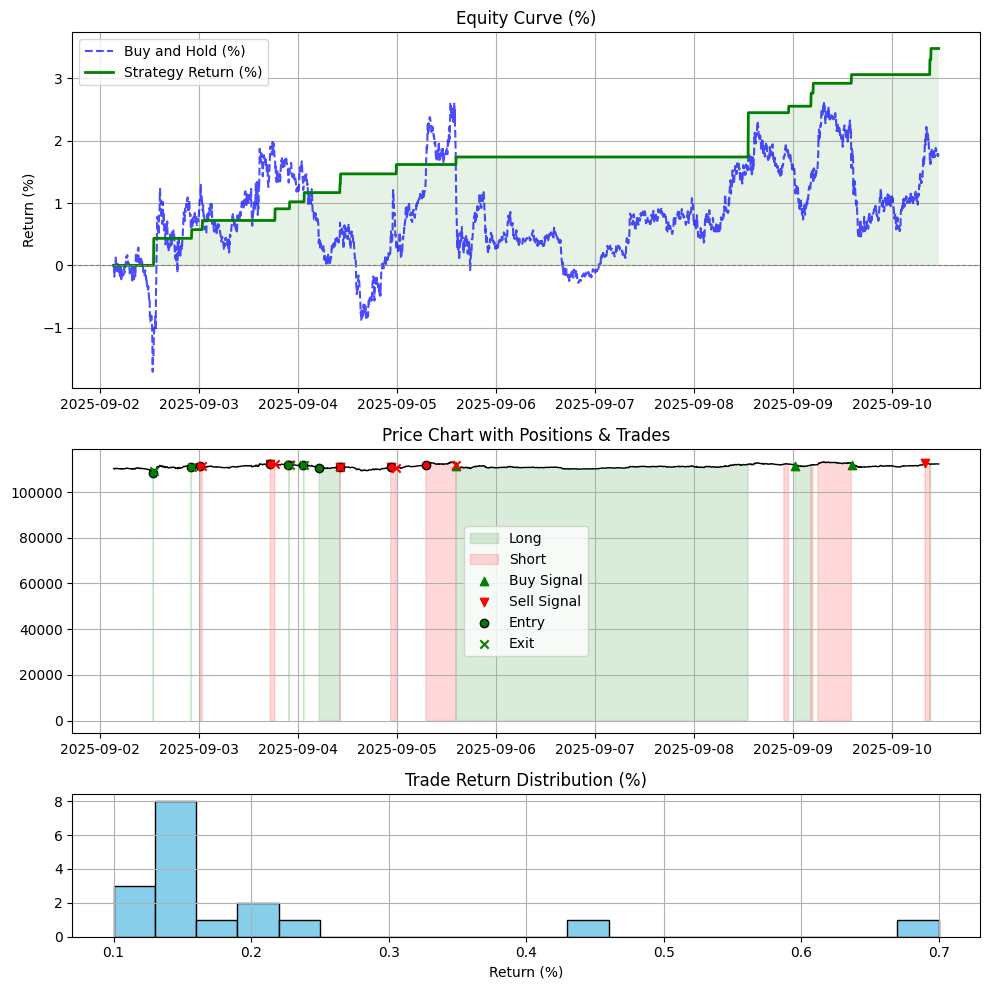

,timestamp,signal,close,reason
9908,2025-09-09 00:27:00+00:00,1,111650.650000,Long Entry
10138,2025-09-09 04:17:00+00:00,-1,111878.960000,Long TP
10142,2025-09-09 04:21:00+00:00,-1,112037.410000,Short Entry
10169,2025-09-09 04:48:00+00:00,1,111865.190000,Short TP
10239,2025-09-09 05:58:00+00:00,-1,112208.720000,Short Entry
10728,2025-09-09 14:07:00+00:00,1,112057.000000,Short TP
11796,2025-09-10 07:55:00+00:00,-1,112561.410000,Short Entry
11865,2025-09-10 09:04:00+00:00,1,112300.730000,Short TP
11870,2025-09-10 09:09:00+00:00,1,112160.520000,Long Entry
11883,2025-09-10 09:22:00+00:00,-1,112355.480000,Long TP


In [4]:
import warnings 
warnings.filterwarnings('ignore')
from Technicalindicatorstrategy import BTC_FVG
from Backtest.backtest import backtest_signals
from Plot.plot import display_trades_log_as_html,plot_backtest_result
from IPython.display import HTML
import pandas as pd
from datetime import datetime,timedelta
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
np.random.seed(42)  # ✅ 固定隨機性（可重現性）
import random
random.seed(42)

df_signals = BTC_FVG.get_signals('BTCUSDT','1m',datetime.now(),12000)

result = backtest_signals(
    df_signals.copy(),
    initial_capital = 100, # 1000台幣
    fee_rate = 0.0000, # 合約手續費
    leverage = 1, # 槓桿
    allow_short = True, # 是否做空
    stop_loss = None,       # 停損閾值，例如0.05代表5%
    take_profit = None,     # 停利閾值
    capital_ratio = 1, # 每次使用的資金佔比
    max_hold_bars = 100000,# 最大持有K棒數
    delay_entry=False,
    risk_free_rate=0
    )  
display(pd.DataFrame(result['Overview performance'],index=['Overview performance']))
display(pd.DataFrame(result['Trades analysis'],index=['Trades analysis']))
display(pd.DataFrame(result['Risk/performance ratios'],index=['Risk/performance ratios']))
html_output = display_trades_log_as_html(result['trades_log'][-10:])
plot_backtest_result(result)
display(HTML(html_output))
display(df_signals.loc[df_signals['signal']!=0,['timestamp','signal','close',"reason"]].tail(10).style.background_gradient())